# Classification with Linearity.

## Make classification dataset.

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples.
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

## Make Data Frame with pandas

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


## Visualize dataframe.

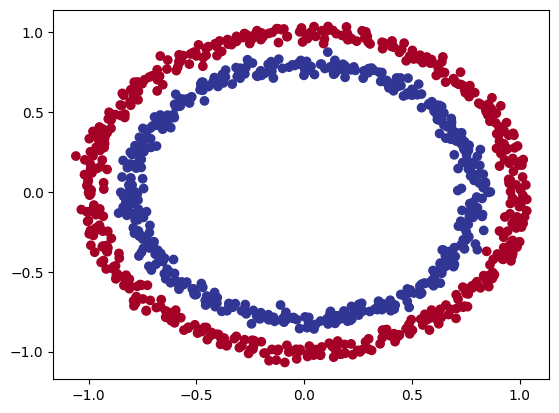

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0], y = X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Checking I/P and O/P shapes.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels.
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Values for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Values for one sample of X: (2,) and the same for y: ()


## Turn dataset into tensors.

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
# Turn data into tensor.
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

## Split data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model.

Building a classification model to classify blue and red dots.
`Steps:`
1. Setup device agnostic code. Run on GPU.
2. Construct model by subclassing `nn.Module`.
3. Define Loss Function and Optimizer.
4. Create a training and test loop.

## Setting device agnostic codes and importing libraries.

In [ ]:
import torch
from torch import nn

# Make device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Constructing a model.
`Steps:`
1. Subclass `nn.Module`.
2. Create 2 `nn.Linear()` layers that are capable of handiling the shapes of our data.
3. Defines a `forward()`method that outlines the forward computation of the model.
4. Create an instance of our model.

**Visulaize the Neural Network on:** https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.57170&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# Subclass nn.Module.
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #Create 2 layers.
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  # Define forward pass.
  def forward(self, x):
    return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output.

# Create and instance of model.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

## Replicating the model above using `nn.Sequential`

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

## Make Prediction

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2302,  0.0962],
                      [-0.4282,  0.1102],
                      [-0.3400, -0.5862],
                      [-0.6454, -0.5611],
                      [ 0.3434, -0.0462]])),
             ('0.bias', tensor([0.0011, 0.4075, 0.5206, 0.2519, 0.4968])),
             ('1.weight',
              tensor([[-0.4283, -0.3878, -0.0780,  0.2629,  0.3181]])),
             ('1.bias', tensor([-0.1905]))])

In [ ]:
untrained_preds = model_0(X_test.to(device))

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"Sample predictions:\n {untrained_preds[:10]}")
print(f"First 10 predictions\n {torch.round(untrained_preds[:10])}")
print(f"First 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
Sample predictions:
 tensor([[-0.3888],
        [-0.3542],
        [-0.2645],
        [-0.4249],
        [ 0.0765],
        [ 0.0949],
        [-0.0781],
        [ 0.0280],
        [-0.2791],
        [-0.3481]])
First 10 predictions
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.]])
First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


After calling `round()`. We see anomalies.

## Setting Loss Function, Optimizer.

- For regression -> MAE or MSE
- For Classification -> Binary Cross Entropy and Cateforical Cross Entropy

In [ ]:
# Setup Loss Function.
loss_fn = nn.BCEWithLogitsLoss()

# Setup Optimizer. optimizer works in such a way that it reduces the loss in loss function.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy realtime.
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Training model.
To train the model we need a training loop.
`Steps`:
1. Do the forward pass.
2. Calculate the loss.
3. Optimizer zero grad.
4. Loss Backward.
5. Optimizer step.

## Going from raw logits -> Prediction Probabilitites -> Prediction Labels.

- Our model output are going to be raw `logits`.
- Convert `logits` into prediction probabilities y passing into activation function.

- Convert model prediction probabillities to prediction labels

In [ ]:
# View the first 5 O/Ps of the forward pass on the test data.
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3888],
        [-0.3542],
        [-0.2645],
        [-0.4249],
        [ 0.0765]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

We need y_logits same as y_test

In [ ]:
# Use sigmoid activation function on our model to turn them into prediction probabilities.
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4040],
        [0.4124],
        [0.4343],
        [0.3954],
        [0.5191]])

In [ ]:
torch.round(y_preds_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

We can call `round()` after using activation function only. We can't call `round()` on raw logits.

In [ ]:
# Find the predicted labels.
y_preds = torch.round(y_preds_probs)

#In Full(logit to preds_probs to pred_labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality.
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension.
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Building Training and Testing Loop.



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device.
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop.
for epoch in range(epochs):
  ### Training.
  model_0.train()

  # 1. Forward pass.
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into pred probs.

  # 2. Calculate loss and accuracy.
  # loss = loss_fn(torch.sigmoid(y_logits),
  #                y_train) # nn.BCELoss expects prediction probabilities

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad.
  optimizer.zero_grad()

  # 4. Loss Backward.
  loss.backward()

  # 5. Optimizer step(gradient descent).
  optimizer.step()

  # 6. Testing.
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass.
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what is happening.
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f}% | Accuracy: {acc:.2}% | Test Loss: {test_loss:0.5f} | Test_accuracy: {test_acc:.2}%")


Epoch: 0 | Loss:  0.70182% | Accuracy: 4.8e+01% | Test Loss: 0.69910 | Test_accuracy: 4.7e+01%
Epoch: 10 | Loss:  0.69896% | Accuracy: 4.9e+01% | Test Loss: 0.69617 | Test_accuracy: 4.8e+01%
Epoch: 20 | Loss:  0.69763% | Accuracy: 4.9e+01% | Test Loss: 0.69493 | Test_accuracy: 4.8e+01%
Epoch: 30 | Loss:  0.69683% | Accuracy: 5e+01% | Test Loss: 0.69432 | Test_accuracy: 4.8e+01%
Epoch: 40 | Loss:  0.69627% | Accuracy: 5e+01% | Test Loss: 0.69400 | Test_accuracy: 4.8e+01%
Epoch: 50 | Loss:  0.69582% | Accuracy: 5e+01% | Test Loss: 0.69380 | Test_accuracy: 4.8e+01%
Epoch: 60 | Loss:  0.69545% | Accuracy: 5e+01% | Test Loss: 0.69369 | Test_accuracy: 4.8e+01%
Epoch: 70 | Loss:  0.69514% | Accuracy: 5.1e+01% | Test Loss: 0.69362 | Test_accuracy: 4.8e+01%
Epoch: 80 | Loss:  0.69487% | Accuracy: 5.1e+01% | Test Loss: 0.69358 | Test_accuracy: 4.8e+01%
Epoch: 90 | Loss:  0.69465% | Accuracy: 5.1e+01% | Test Loss: 0.69356 | Test_accuracy: 4.8e+01%
Epoch: 100 | Loss:  0.69445% | Accuracy: 5e+01% |

## Make Predictions and evaluate model.

From metrices, we see our model is not learning anything.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo.
# Writing a command to get the contents from an URL.
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

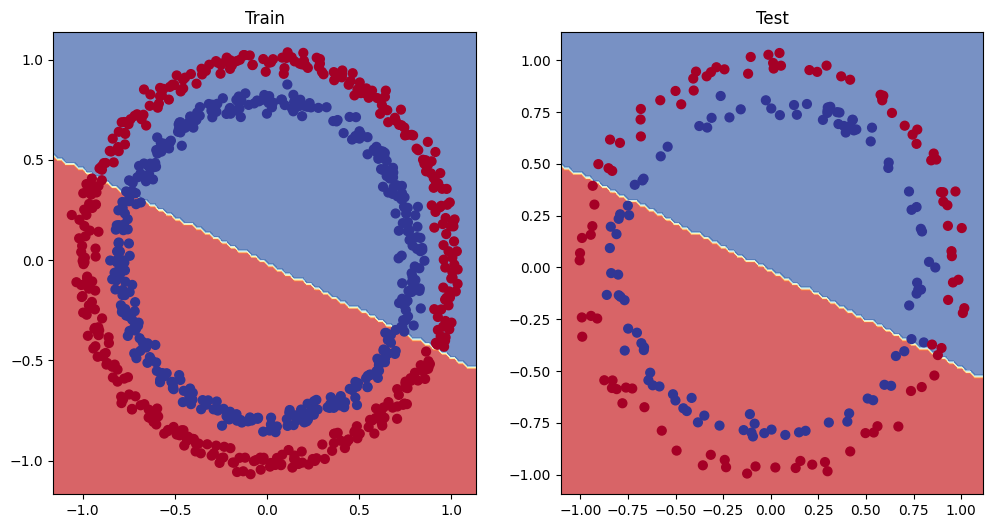

In [ ]:
## Plot decision boundary of the model.
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model.
- Add more layers - give the model more chances to learn about patterns in the dataset.
- Add more hidden units -go from 5 hidden units to 10 hidden units.
- Fit for longer - more epochs.
- Changing activation functions.
- Change the learning rate.
- Change the loss function.

Improving model performance by:
1. Adding more hidden units. [ 5 -> 10]
2. increasing the number of layers. [2 -> 3]
3. Increase the number of epochs. [100 -> 1000]

Tool to monitor experiments:
`torch.utils.tensorboard`

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1048, -0.0784],
                      [-0.3391, -0.0141],
                      [-0.3026, -0.6377],
                      [-0.7335, -0.4386],
                      [ 0.2437,  0.0927]])),
             ('0.bias', tensor([-0.0439,  0.3714,  0.5109,  0.2817,  0.5320])),
             ('1.weight',
              tensor([[-0.3743, -0.2051, -0.1875,  0.2898,  0.2920]])),
             ('1.bias', tensor([-0.0805]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
#     z = self.layer1(x)
#     z = self.layer2(z)
#     z = self.layer3(z)
#     return z

# model_1 = CircleModelV1().to(device)
# model_1

    return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function.
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer.
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer.
epochs = 1000

# Put data on the target device.
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training.
  model_1.train()

  # Forward pass.
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss / accuracy.
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad.
  optimizer.zero_grad()

  # Loss backward.
  loss.backward()

  # Optimizer step.
  optimizer.step()

  # Testing.
  model_1.eval() # Putting model_1 in evaluation mode.
  with torch.inference_mode():
    # 1. Forward pass.
    test_logits = model_1(X_test).squeeze()
    # For binary classification problem we use "SIGMOID"
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss / accuracy.
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print what's happening.
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f}% | Accuracy: {acc:.2}% | Test Loss: {test_loss:0.5f} | Test_accuracy: {test_acc:.2}%")


Epoch: 0 | Loss:  0.69396% | Accuracy: 5.1e+01% | Test Loss: 0.69261 | Test_accuracy: 5.1e+01%
Epoch: 100 | Loss:  0.69305% | Accuracy: 5e+01% | Test Loss: 0.69379 | Test_accuracy: 4.8e+01%
Epoch: 200 | Loss:  0.69299% | Accuracy: 5.1e+01% | Test Loss: 0.69437 | Test_accuracy: 4.6e+01%
Epoch: 300 | Loss:  0.69298% | Accuracy: 5.2e+01% | Test Loss: 0.69458 | Test_accuracy: 4.5e+01%
Epoch: 400 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69465 | Test_accuracy: 4.6e+01%
Epoch: 500 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69467 | Test_accuracy: 4.6e+01%
Epoch: 600 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69468 | Test_accuracy: 4.6e+01%
Epoch: 700 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69468 | Test_accuracy: 4.6e+01%
Epoch: 800 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69468 | Test_accuracy: 4.6e+01%
Epoch: 900 | Loss:  0.69298% | Accuracy: 5.1e+01% | Test Loss: 0.69468 | Test_accuracy: 4.6e+01%


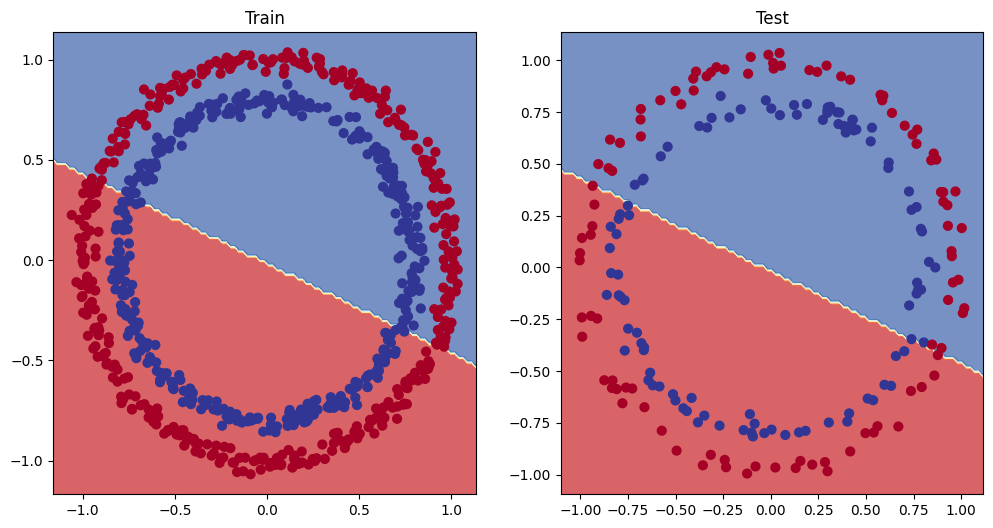

In [ ]:
## Plot decision boundary of the model.
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Still the model is not learning anything. Because we were doing Linear layers for Non-Linear dataset. And the model we built earlier works on Linear dataset perfectly.

## Preparing the dataset to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Create train and test splits.
train_split = int(0.8 * len(X_regression))
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_reg), len(X_test_regression), len(y_train_reg), len(y_test_regression)

(80, 20, 80, 20)

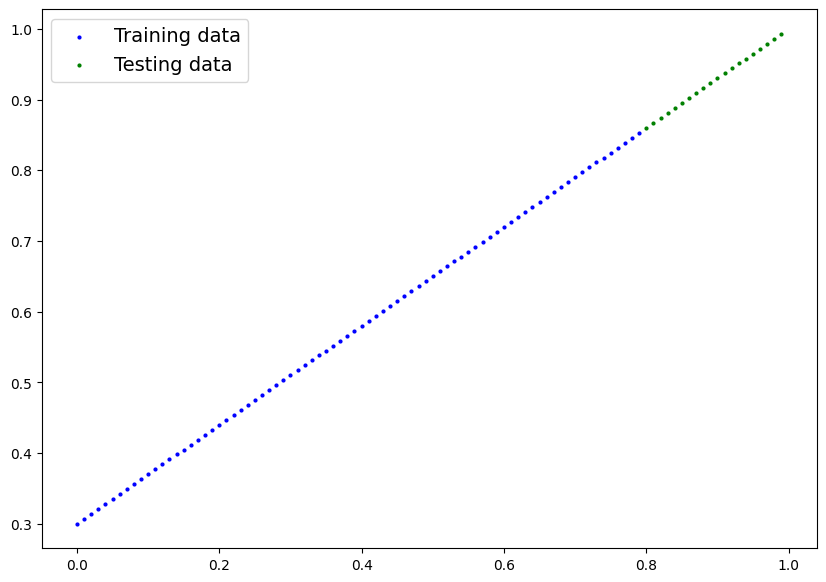

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

## Adjusting `model_1` to fit a straight line.
Adjusting model_1 to fit a straight line. Need to adjust in_feature here. As our dataset has only one feature.


In [ ]:
# Same architecture as model_1(but using nn.Sequential())
# Faster way of coding a model.
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and Optimizer.
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model.
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs.
epochs = 1000

# Put the data on the target device.
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

In [ ]:
# Training
for epoch in range(epochs):
  # Do the forward pass.
  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # Testing.
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print what's happening.
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test Loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.75986 | Test Loss:  0.91103
Epoch: 100 | Loss:  0.02858 | Test Loss:  0.00081
Epoch: 200 | Loss:  0.02533 | Test Loss:  0.00209
Epoch: 300 | Loss:  0.02137 | Test Loss:  0.00305
Epoch: 400 | Loss:  0.01964 | Test Loss:  0.00341
Epoch: 500 | Loss:  0.01940 | Test Loss:  0.00387
Epoch: 600 | Loss:  0.01903 | Test Loss:  0.00379
Epoch: 700 | Loss:  0.01878 | Test Loss:  0.00381
Epoch: 800 | Loss:  0.01840 | Test Loss:  0.00329
Epoch: 900 | Loss:  0.01798 | Test Loss:  0.00360


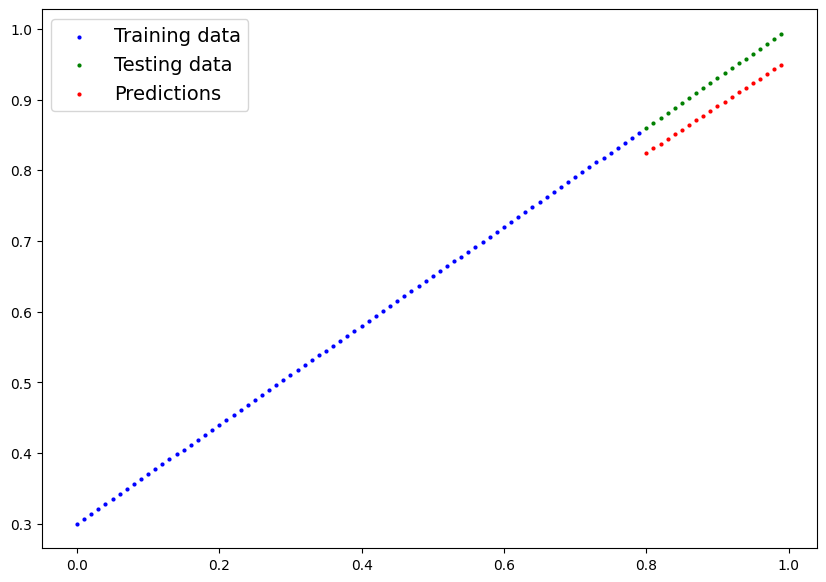

In [ ]:
# Turn on evaluation mode.
model_2.eval()

# Make some predictions.
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

Yes our model works on Linear dataset perfectly.

# Classifying with Non-Linearity.

## Recreating Non-Linear dataset.

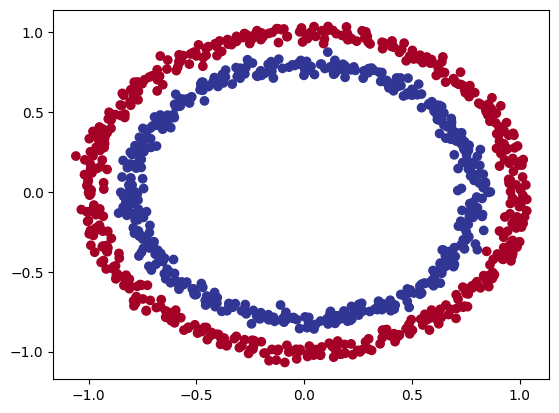

In [ ]:
# Make an plot data.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train and test splits.
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors.
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:10], y_train[:10]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.]))

## Building model with Non-Linearity.

In [ ]:
# Build a model with non-linear activation function.
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features =10)
    self.layer2 = nn.Linear(in_features = 10, out_features =10)
    self.layer3 = nn.Linear(in_features = 10, out_features =1)
    self.relu = nn.ReLU() #ReLU is a non-linear activation function.

  def forward(self, x):
    # Where should we put non-linear activation function?
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## Setup Loss and optimizer.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

## Training `model_3` with non-linearity.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device.
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Loop through the data.
epochs = 1000

for epoch in range(epochs):
  ## Training.
  model_3.train()

  # 1. Forward pass.
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss.
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad.
  optimizer.zero_grad()

  # Loss Backward.
  loss.backward()

  # Step the optimizer.
  optimizer.step()

  ## Testing.
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  # Print what's happening.
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.5645 | Accuracy: 88.12% | Test Loss: 0.5706, Test Accuracy: 88.00%
Epoch: 100 | Loss: 0.4764 | Accuracy: 93.88% | Test Loss: 0.4952, Test Accuracy: 90.00%
Epoch: 200 | Loss: 0.3647 | Accuracy: 98.00% | Test Loss: 0.4009, Test Accuracy: 92.50%
Epoch: 300 | Loss: 0.2495 | Accuracy: 99.00% | Test Loss: 0.2982, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.1687 | Accuracy: 99.50% | Test Loss: 0.2178, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.1200 | Accuracy: 99.75% | Test Loss: 0.1629, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.0900 | Accuracy: 99.88% | Test Loss: 0.1259, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.0702 | Accuracy: 99.88% | Test Loss: 0.1022, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.0572 | Accuracy: 99.88% | Test Loss: 0.0860, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.0481 | Accuracy: 99.88% | Test Loss: 0.0742, Test Accuracy: 99.50%


## Plot decision boundary of the model.

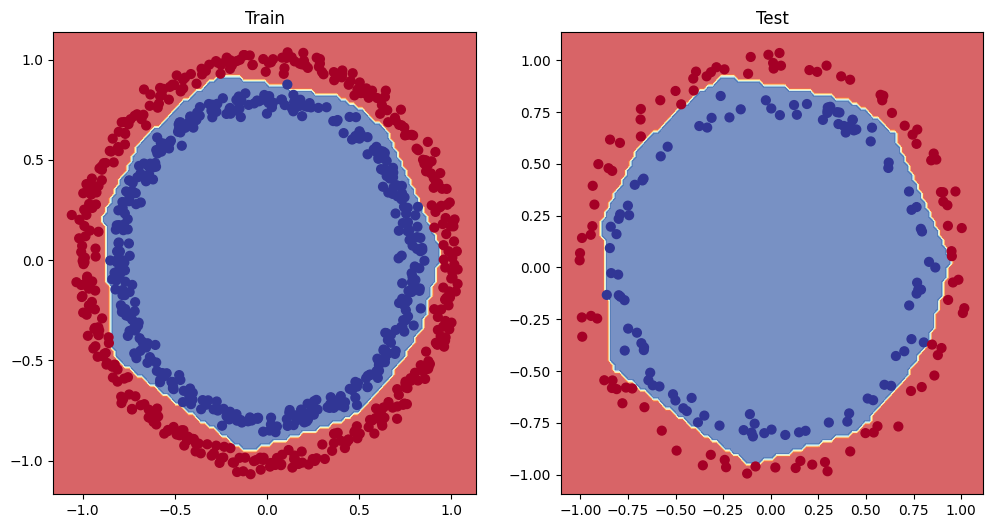

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Make Predictions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Replicating non-linear activation functions.

##  Replicating the ReLU() with scratch.


In [ ]:
# Create a tensor.
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

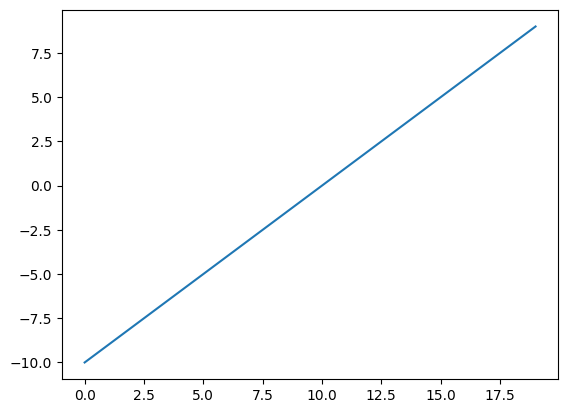

In [ ]:
# Visualize the tensor.
plt.plot(A);

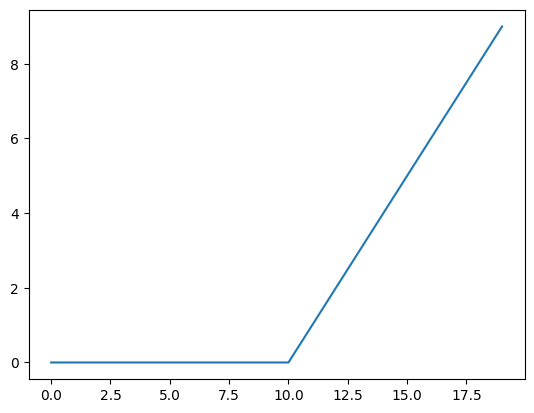

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
# Scratch code.
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

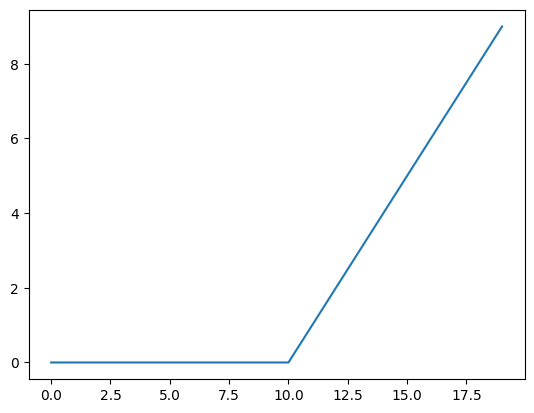

In [ ]:
plt.plot(relu(A));

## Replicating Sigmoid Function.

In [ ]:
# Scratch code.
def sigmoid(x):
  return 1/(1+torch.exp(-x))

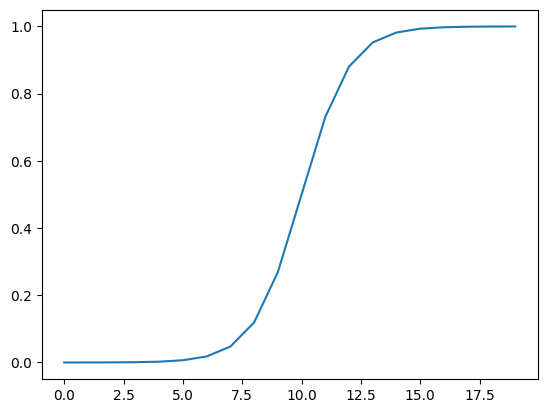

In [ ]:
plt.plot(torch.sigmoid(A));

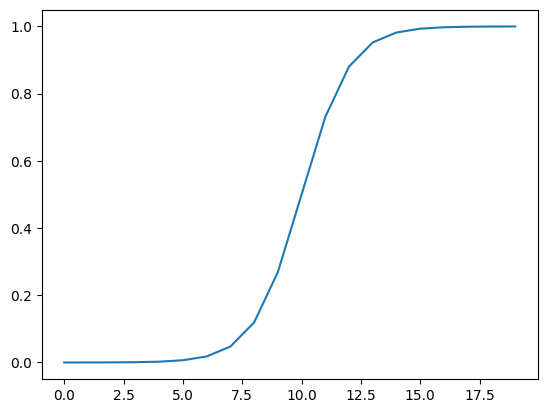

In [ ]:
plt.plot(sigmoid(A));